<a href="https://colab.research.google.com/github/PatGeorgian/Patrick.Odita.BDAT1004PS-2/blob/main/MultinomialNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multinomial Naive Bayes Assignment

# importing necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Loading the dataset

In [2]:
# Step 1: Load the dataset
from google.colab import files
uploaded = files.upload()
# Assuming the dataset is in 'spam.xlsx' and the sheet name is 'spam'
df = pd.read_excel('spam.xlsx', sheet_name='spam')

Saving spam.xlsx to spam.xlsx


# Step 2: Explore the dataset

In [3]:
# Step 2: Explore the dataset
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns)
print("\nClass distribution:")
# Access the column using the original name before renaming
print(df['v1'].value_counts()) # Changed 'V1' to 'v1'

Dataset shape: (5572, 5)

Columns: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Class distribution:
v1
ham     4825
spam     747
Name: count, dtype: int64


# Step 3: Preprocess the data

In [4]:
# Step 3: Preprocess the data
# Drop irrelevant columns (B, C, D, E are empty)
df = df[['v1', 'v2']] # Changed 'V1' to 'v1' and 'V2' to 'v2'

# Rename columns for clarity
df.columns = ['label', 'text']

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Convert labels to binary: spam = 1, ham = 0
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Convert 'text' column to string type
df['text'] = df['text'].astype(str) # Convert to string to avoid error

# Split the dataset into features (X) and labels (y)
X = df['text']
y = df['label']


Missing values in each column:
label    0
text     0
dtype: int64


# Step 4: Convert text data into numerical representations

In [5]:
# Step 4: Convert text data into numerical representations
# Use CountVectorizer to convert text into word counts
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(X)

# Step 5: Split the data into training and testing sets

In [6]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.2, random_state=42)

# Step 6: Train the Naive Bayes classifier

In [7]:
# Step 6: Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


MultinomialNB()

# Step 7: Make predictions on the test set

In [8]:
# Step 7: Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Step 8: Evaluate the model

In [9]:
# Step 8: Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy * 100)


Accuracy: 97.847533632287


# Calculate precision, recall, and F1-score

In [10]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1-Score:", f1 * 100)

Precision: 91.44736842105263
Recall: 92.66666666666666
F1-Score: 92.05298013245033


# Confusion matrix

In [11]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[952  13]
 [ 11 139]]


# Plot the confusion matrix using Seaborn

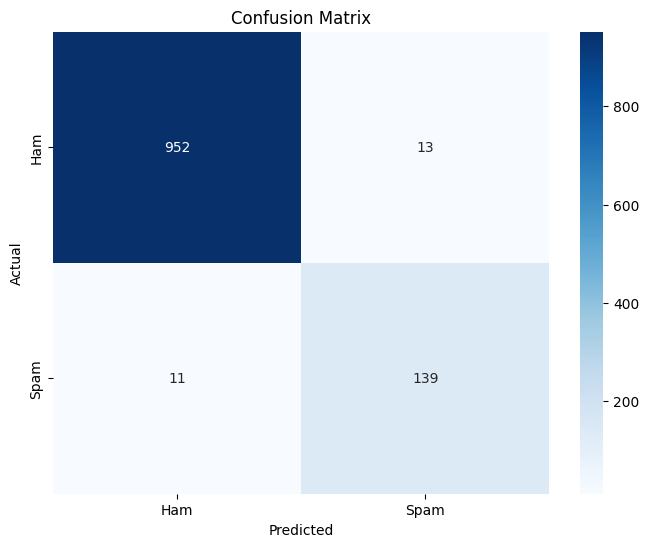

In [12]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()